### 1. Setup

In [5]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bi

In [ ]:
!pip install --upgrade datasets

In [ ]:
pip install librosa

### 2. Download the GTZAN Dataset

In [3]:
from datasets import load_dataset
import os
import shutil

# download the dataset
dataset = load_dataset("marsyas/gtzan", trust_remote_code=True)

# path to the downloaded gtzan dataset is in the /root/.cache/
dataset_cache_dir = '/root/.cache/huggingface/datasets/downloads/extracted/5022b0984afa7334ff9a3c60566280b08b5179d4ac96a628052bada7d8940244'

# set the destination directory in content/
destination_dir = '/content/raw/gtzan'

# remove the existing destination directory if it exists, then copy the dataset
if os.path.exists(destination_dir):
    shutil.rmtree(destination_dir)
    print(f"Removed existing directory: {destination_dir}")

# attempt to copy the downloaded gtzan dataset to content/raw/gtzan
if os.path.exists(dataset_cache_dir):
    shutil.copytree(dataset_cache_dir, destination_dir)
    print("Dataset copied to:", destination_dir)
else:
    print("Dataset directory not found:", dataset_cache_dir)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

Dataset copied to: /content/raw/gtzan


### 3. Define Imports

In [7]:
from glob import glob           # search for files using patterns, specifically .wav
import IPython.display as ipd   # play an audio sample directly in the notebook
import librosa                  # load and analyze audio data
import librosa.display          # display audio data
import matplotlib.pyplot as plt # display and plot audio data
import numpy as np              # perform numerical operations on audio data arrays

### 4. Read Audio Files into an Array

In [8]:
pattern = '/content/raw/gtzan/genres/*/*.wav'

audio_files = glob(pattern)

### 5. Play an Audio File

In [9]:
ipd.Audio(audio_files[999])

### 6. Load an Audio File with Librosa

In [10]:
audio_path = audio_files[999]
audio, sample_rate = librosa.load(audio_path, sr=None)

print(f'Audio length: {audio.shape[0] / sample_rate} seconds')
print(f'Sample rate: {sample_rate}')
print(f'Shape of audio: {audio.shape}')

Audio length: 30.013333333333332 seconds
Sample rate: 22050
Shape of audio: (661794,)


### 7. Visualize the Audio File

Text(67.34722222222221, 0.5, 'Amplitude')

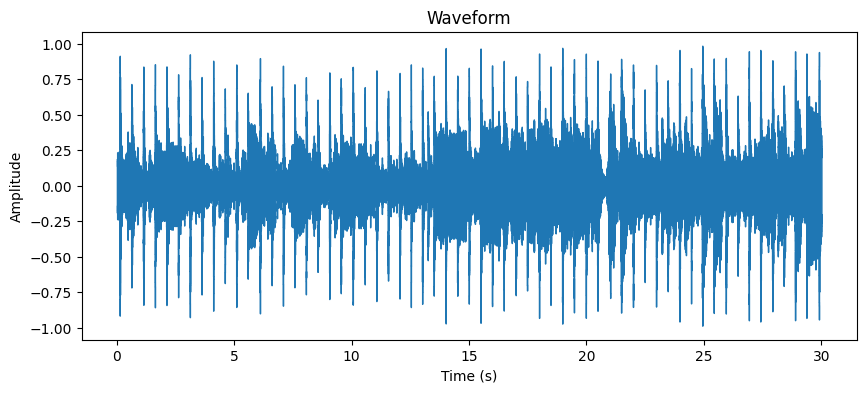

In [11]:
# display the full waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sample_rate)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

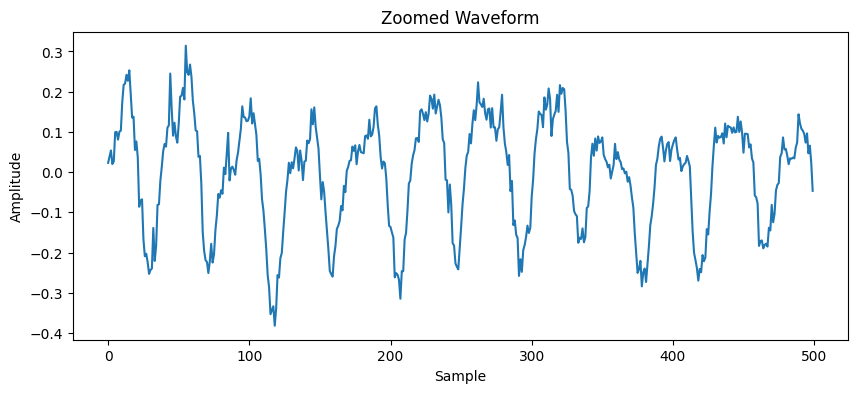

In [12]:
# zoom into a specific part of the waveform
start_sample = 10000
end_sample = 10500
plt.figure(figsize=(10, 4))
plt.plot(audio[start_sample:end_sample])
plt.title('Zoomed Waveform')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.show()

### 8. Frequency and Intensity Analysis

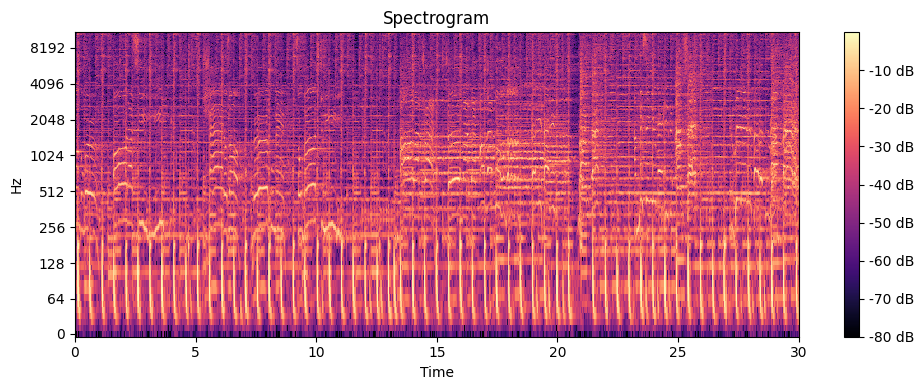

In [13]:
D = np.abs(librosa.stft(audio))

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                          y_axis='log', x_axis='time', sr=sample_rate)
plt.title('Spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()